## Introducción a Python para el Análisis de datos
###  Webscraping

En este documento vamos a mostrar como obtener algunos datos de Internet. 
Desde precios de acciones o de criptomonedas hasta


### 1. Precio de la accion de Facebook desde el 2012 hasta el 2021:

Pandas data reader nos dará información diaria sobre el precio de las acciones. Tendremos datos del precio mínimo, máximo, el precio de apertura y de cierre, etc.

In [18]:
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [19]:
empresa = 'FB'

In [20]:
inicio = dt.datetime(2012,1,1)
final = dt.datetime(2021,1,1)

In [21]:
facebook = web.DataReader(empresa, 'yahoo',inicio ,final)

In [22]:
facebook

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
...,...,...,...,...,...,...
2020-12-24,270.399994,266.200012,268.880005,267.399994,6702000,267.399994
2020-12-28,277.299988,265.660004,268.739990,277.000000,23299700,277.000000
2020-12-29,280.510010,276.279999,276.950012,276.779999,16383000,276.779999


In [24]:
import matplotlib.pyplot as plt 

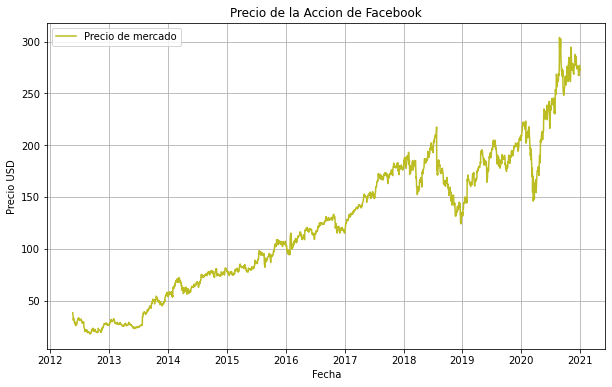

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(facebook.Close, color='tab:olive' ,label='Precio de mercado')

ax.set_xlabel('Fecha')
ax.set_ylabel('Precio USD')
ax.set_title('Precio de la Accion de Facebook')
ax.grid(True)
ax.legend(loc='upper left');

### 2. Precio de Bitcoin para los ultimos 30 dias:

A diferencia de pandas data reader, pycoingecko nos dará información para cada hora de cada día, por lo que dependiendo de nuestro objetivo, querremos usar una u otra librería. Para este caso obtendremos los datos, los pasaremos a formato diario y haremos una grafica de velas.

In [26]:
#Para instalar pycoingecko
#pip install pycoingecko

In [3]:
from pycoingecko import CoinGeckoAPI

In [4]:
cg = CoinGeckoAPI()

Vamos a obtener los datos de bitcoin en dólares, para los últimos 30 días. Esto lo haremos de la siguiente manera:

In [5]:
bitcoin = cg.get_coin_market_chart_by_id(id='bitcoin' , vs_currency = 'usd', days = 30 )

In [6]:
bitcoin

{'prices': [[1620745347484, 55807.141156993894],
  [1620748949706, 56188.39651793171],
  [1620752582550, 56151.35419122988],
  [1620756066701, 56447.87560142653],
  [1620759807054, 56495.11002546482],
  [1620763437324, 56589.30988858585],
  [1620766888577, 56824.63058972232],
  [1620770529314, 56453.584033877516],
  [1620774209158, 56430.89675789497],
  [1620777731889, 56928.97235660158],
  [1620781823416, 57248.057329835334],
  [1620784890750, 56988.54093430655],
  [1620788548972, 57089.140196350716],
  [1620792139946, 57781.57445959879],
  [1620795724913, 57302.165907056136],
  [1620799379221, 57266.73757992159],
  [1620802984791, 57046.73254624193],
  [1620806460119, 57201.895837285694],
  [1620810041802, 56866.15418031749],
  [1620813628813, 56967.83567297854],
  [1620817409858, 56112.95280687772],
  [1620820982538, 56437.99683570616],
  [1620825665668, 56088.15752721541],
  [1620828089158, 56706.61782614403],
  [1620831713227, 56170.175547293475],
  [1620835292892, 55583.700715287

In [7]:
bitcoinprice = bitcoin['prices']

In [8]:
bitcoindata = pd.DataFrame(bitcoinprice, columns = ['TimeStamp' , 'prices'])

In [9]:
bitcoindata

,TimeStamp,prices
0,1620745347484,55807.141157
1,1620748949706,56188.396518
2,1620752582550,56151.354191
3,1620756066701,56447.875601
4,1620759807054,56495.110025
...,...,...
716,1623322956426,37969.914268
717,1623326965307,37920.021915
718,1623330837810,37928.932969
719,1623333980969,38043.348506


In [10]:
bitcoindata['date'] = pd.to_datetime(bitcoindata['TimeStamp'], unit = 'ms')

In [11]:
bitcoindata

,TimeStamp,prices,date
0,1620745347484,55807.141157,2021-05-11 15:02:27.484
1,1620748949706,56188.396518,2021-05-11 16:02:29.706
2,1620752582550,56151.354191,2021-05-11 17:03:02.550
3,1620756066701,56447.875601,2021-05-11 18:01:06.701
4,1620759807054,56495.110025,2021-05-11 19:03:27.054
...,...,...,...
716,1623322956426,37969.914268,2021-06-10 11:02:36.426
717,1623326965307,37920.021915,2021-06-10 12:09:25.307
718,1623330837810,37928.932969,2021-06-10 13:13:57.810
719,1623333980969,38043.348506,2021-06-10 14:06:20.969


Ahora pasaremos los datos en un formato de minimo, maximo, primer y ultimo precio, diario. Esto, para crear una grafica de velas.

In [12]:
data = bitcoindata.groupby(bitcoindata.date.dt.date).agg({'prices': ['min' , 'max' , 'first' , 'last']})
# Con este comando agruparemos los datos por dia y encontraremos el precio minimo, maximo, primer y ultimo dato.

In [13]:
data

prices                                          
                     min           max         first          last
date                                                              
2021-05-11  55807.141157  56824.630590  55807.141157  56430.896758
2021-05-12  52906.534980  57781.574460  56928.972357  52906.534980
2021-05-13  48267.777473  51259.474118  50004.762183  49333.972848
2021-05-14  49049.418674  51253.265262  49972.795398  49950.269441
2021-05-15  47740.050057  50615.466772  49913.263144  48159.550779
2021-05-16  44490.795222  49676.818738  46780.902305  45683.458099
2021-05-17  42600.146924  46585.064135  46585.064135  42746.071431
2021-05-18  42815.404663  45549.156681  43780.825598  43022.377837
2021-05-19  36573.548038  43091.041448  43091.041448  39154.208053
2021-05-20  37440.302997  41947.196711  38040.943346  41596.348073
2021-05-21  34386.609592  41757.137345  41161.937246  37384.019087
2021-05-22  35920.891747  38546.599099  37073.004560  37828.543905
2021-05-23  32458.122485  38360.641029  37032.672365  33995.040863
2021-05-24  34850.731787  40417.617244  34892.633299  38458.085643
2021-05-25  36755.333137  39546.087626  38810.164535  38558.947521
2021-05-26  38150.984549  40556.617553  38210.805218  38805.033942
2021-05-27  37406.487684  40109.301850  39466.642793  38541.079756
2021-05-28  35076.872522  38371.880070  38371.880070  35336.082856
2021-05-29  33846.607820  37050.556152  35744.457735  34363.022086
2021-05-30  33970.688099  36251.761333  34537.419075  35726.046487
2021-05-31  34306.896758  37230.114854  35714.752020  36934.451092
2021-06-01  35663.453003  37715.798820  37715.798820  36451.907824
2021-06-02  36233.029570  38174.225418  36663.448346  37587.034649
2021-06-03  37339.291099  39501.065673  37451.660847  39100.676932
2021-06-04  36321.025062  39151.316184  39151.316184  37160.492643
2021-06-05  35072.140405  37966.091306  36848.909698  35072.140405
2021-06-06  35502.108234  36356.780991  35605.821928  35502.108234
2021-06-07  34150.238383  36750.903651  35834.474474  34183.150733
2021-06-08  31681.562668  33901.499467  33901.499467  33502.495642
2021-06-09  32580.523479  37187.329901  33175.471094  37187.329901
2021-06-10  36430.957724  38407.469192  37484.664195  37282.000109

Como podemos ver, los datos que tenemos ahora son datos diarios, y no por hora.
Ahora crearemos una grafica con toda esta información.

In [14]:
# pip install plotly==4.14.3


In [15]:
import plotly.graph_objects as go
#Usaremos plotly para este tipo de grafica

In [17]:
fig = go.Figure(data = [go.Candlestick(x=data.index , 
                        open = data['prices']['first'],
                        high = data['prices']['max'] , 
                        low= data['prices']['min'] , 
                        close = data['prices']['last']
                                      )])

fig.update_layout(xaxis_rangeslider_visible = False , xaxis_title = 'date',
yaxis_title = 'Precio (USD$)' , title = 'Bitcoin gráfico de velas ultimos 30 dias')

### 3. HTML webscraping
